In [7]:
import torch 
from torchvision import datasets
import matplotlib.pyplot as plt
import sys 
import os
import random
from PIL import Image

# ---- Preprocesing ----
import torchvision.transforms as transforms #Coleccion de funciones de procesamiento
from torch.utils.data import Dataset, DataLoader #Dataset lo import para heredar la clase, el DataLoader lo que hace es partir el dataset en batches de imagnes
from torchvision.utils import make_grid

# ---- NN ----
import torch.nn as nn
import torch.nn.functional as F # Capas sin parametros
import torch.optim as optim #Metodos de optimizacion
 


sys.path.append('data/')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
from plot_helpers import imshow

# Introduction

In [9]:
cifar = datasets.CIFAR10('data/', download=True)

Files already downloaded and verified


In [10]:
len(cifar)

50000

## Cambiar de cpu a gpu

In [11]:
data = torch.Tensor(cifar.data)
data.to(device)

tensor([[[[ 59.,  62.,  63.],
          [ 43.,  46.,  45.],
          [ 50.,  48.,  43.],
          ...,
          [158., 132., 108.],
          [152., 125., 102.],
          [148., 124., 103.]],

         [[ 16.,  20.,  20.],
          [  0.,   0.,   0.],
          [ 18.,   8.,   0.],
          ...,
          [123.,  88.,  55.],
          [119.,  83.,  50.],
          [122.,  87.,  57.]],

         [[ 25.,  24.,  21.],
          [ 16.,   7.,   0.],
          [ 49.,  27.,   8.],
          ...,
          [118.,  84.,  50.],
          [120.,  84.,  50.],
          [109.,  73.,  42.]],

         ...,

         [[208., 170.,  96.],
          [201., 153.,  34.],
          [198., 161.,  26.],
          ...,
          [160., 133.,  70.],
          [ 56.,  31.,   7.],
          [ 53.,  34.,  20.]],

         [[180., 139.,  96.],
          [173., 123.,  42.],
          [186., 144.,  30.],
          ...,
          [184., 148.,  94.],
          [ 97.,  62.,  34.],
          [ 83.,  53.,  34.]],



In [12]:
data.size()

torch.Size([50000, 32, 32, 3])

## Capas de una red neuronal

---



In [13]:
import torch.nn as nn

In [14]:
Linear = nn.Linear(in_features=4096, out_features=10) # Tensores de 1 dimencion de entrada
conv = nn.Conv2d(in_channels=3, out_channels=9, kernel_size=3, stride=1, padding=1 ) #Esta red solo va a modificar la cantidad de canales
relu = nn.ReLU(False)

### Capa Lineal

In [15]:
X = torch.randn(4096)
y = Linear(X)
y.size()

torch.Size([10])

Ver los parametros

In [16]:
for name , p in list(Linear.named_parameters()):
  print(name)
  print( p.size())
  print()

weight
torch.Size([10, 4096])

bias
torch.Size([10])



### Capa Convolucional

In [17]:
X = torch.randn([4096,3,32,32]) # 4096 imagenes de tres canales con un size de 32x32
y = conv(X)
y.size()

torch.Size([4096, 9, 32, 32])

### RELU

In [18]:
X = torch.randn([4096,3,32,32]) # 4096 imagenes de tres canales con un size de 32x32
y = relu(X)
y.size()
print('Original :\n\t',X[0][0][0],'\n\n','Resultado :\n\t',y[0][0][0])

Original :
	 tensor([-1.0481,  0.4200,  0.8510,  1.2168, -0.5031,  0.6771, -0.0085, -0.3902,
        -0.7432, -0.3691, -0.6823,  0.4438, -1.4130,  0.9758,  0.5973, -1.6512,
        -0.0447,  2.1118, -0.3634,  0.8105, -1.4371, -1.3194,  0.2269,  1.3633,
        -0.6135, -0.4486,  0.6834,  0.3329, -0.4151,  0.0082,  0.5155,  0.5553]) 

 Resultado :
	 tensor([0.0000, 0.4200, 0.8510, 1.2168, 0.0000, 0.6771, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.4438, 0.0000, 0.9758, 0.5973, 0.0000, 0.0000, 2.1118,
        0.0000, 0.8105, 0.0000, 0.0000, 0.2269, 1.3633, 0.0000, 0.0000, 0.6834,
        0.3329, 0.0000, 0.0082, 0.5155, 0.5553])


# Caragar los datos

In [19]:
class SINGSDataset(Dataset):

  def __init__(self, base_dir, split= 'train', transform = None ):
    path = os.path.join(base_dir, '{}_signs'.format(split))   
    files = os.listdir(path)
    self.files_names = [os.path.join(path,f) for f in files if f.endswith('.jpg')]
    self.targets = [int(f[0]) for f in files if f.endswith('.jpg')]
    self.transform = transform

  def __len__(self):
    return len(self.files_names)
  
  def __getitem__(self, idx):
    image = Image.open(self.files_names[idx])
    if self.transform:
      image = self.transform(image)
    return image, self.targets[idx]

In [20]:
base_dir = 'data/64x64_SIGNS'
train_set = SINGSDataset(base_dir, split='train', transform= transforms.ToTensor())

Como este es un dataset que no lo importamos desde torch, no tenía las funciones de len y getitem implementadas, por lo que tuvimo que implementarlas, y al crear la clase con herencia, ahora tiene los demás atributos

In [21]:
len(train_set)

864

In [22]:
train_set[0][0]

tensor([[[0.9294, 0.9255, 0.9137,  ..., 0.9059, 0.9059, 0.9059],
         [0.9294, 0.9216, 0.9098,  ..., 0.9059, 0.9059, 0.9059],
         [0.9255, 0.9216, 0.9098,  ..., 0.9059, 0.9059, 0.9059],
         ...,
         [0.8039, 0.8039, 0.8039,  ..., 0.8196, 0.8235, 0.8235],
         [0.7961, 0.7961, 0.7961,  ..., 0.8157, 0.8157, 0.8196],
         [0.7882, 0.7922, 0.7922,  ..., 0.8078, 0.8118, 0.8118]],

        [[0.8471, 0.8471, 0.8549,  ..., 0.8863, 0.8863, 0.8863],
         [0.8471, 0.8510, 0.8588,  ..., 0.8863, 0.8863, 0.8863],
         [0.8510, 0.8510, 0.8588,  ..., 0.8863, 0.8863, 0.8863],
         ...,
         [0.7725, 0.7725, 0.7725,  ..., 0.8039, 0.8078, 0.8078],
         [0.7647, 0.7647, 0.7647,  ..., 0.8000, 0.8000, 0.8039],
         [0.7608, 0.7608, 0.7608,  ..., 0.7922, 0.7961, 0.7961]],

        [[0.8431, 0.8431, 0.8353,  ..., 0.8627, 0.8627, 0.8627],
         [0.8431, 0.8353, 0.8353,  ..., 0.8627, 0.8627, 0.8627],
         [0.8353, 0.8353, 0.8353,  ..., 0.8627, 0.8627, 0.

# Preprocessing

---



In [23]:
dataloader = DataLoader(train_set, batch_size=32)

In [24]:
dataloader



Targets: tensor([1, 1, 4, 1, 4, 0, 4, 4, 3, 4, 1, 4, 0, 3, 2, 1, 5, 3, 5, 4, 3, 4, 5, 1,
        1, 1, 1, 2, 4, 3, 0, 5])


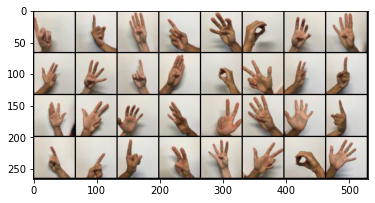

In [25]:
for input, target in dataloader:
  out = make_grid(input) #Crear una grilla
  image = out.permute(1,2,0)
  plt.imshow(image)
  print('\n\nTargets:',target)
  break

# Create the NN



El tamaño de la imagen después de haberla pasado por una red convu+olucioanl se puede calcular con esta formula, siendo o el tamaño del output, S el stride, P el padding y F el kernel_size

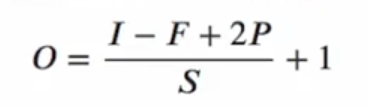

In [26]:
class NN(nn.Module):
  def __init__(self,num_channels):
    super().__init__()

    self.num_channels = num_channels
    
    #Capas convoluconales
    self.conv1 = nn.Conv2d(3, out_channels= self.num_channels, kernel_size= 3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(self.num_channels, out_channels= self.num_channels*2, kernel_size= 3, stride=1, padding=1)
    self.conv3 = nn.Conv2d(self.num_channels*2, out_channels= self.num_channels*4, kernel_size= 3, stride=1, padding=1)
    
    # Capas lineales 
    self.lineal1 = nn.Linear(self.num_channels*4*8*8, out_features= self.num_channels*4)
    self.lineal2 = nn.Linear(self.num_channels*4 , out_features= 6)

  def forward(self,x):
      x = self.conv1(x) # num_channels x 64 x 64
      x = F.relu(F.max_pool2d(x, 2)) #num_channels x 32 x 32
      x = self.conv2(x) # num_channels*2 x 32 x32
      x = F.relu(F.max_pool2d(x, 2)) #num_channels*2 x 16 x 16
      x = self.conv3(x) #num_channels*4 x 16 x 16
      x = F.relu(F.max_pool2d(x, 2)) #num_channels*4 x 8 x 8

      # flatten 
      x = x.view(-1, self.num_channels*4*8*8)
       
      # Aplicar las capas lineales 
      x = self.lineal1(x)
      x = F.relu(x)
      x = self.lineal2(x)
      x = F.log_softmax(x,dim=1)

      return x

In [27]:
class RunningMetrics():
  def __init__(self):
    self.S = 0
    self.N = 0
  
  def update(self, value, size):
    self.S += value
    self.N += size
  
  def __call__(self):
    return self.S/float(self.N)

In [28]:
net = NN(32).to(device)

loss_fn = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [38]:
num_epoch = 150

for epoch in range(num_epoch):
  print('Epoch {}/{}'.format(epoch+1,num_epoch))
  print('---'*10)

  running_loss = RunningMetrics() #Calculaer la perdida 
  running_acc  = RunningMetrics() #Clacular el accuracy

  for inputs, target in dataloader:
    inputs, target = inputs.to(device), target.to(device) #Pasar los tensores a la gpu
    
    optimizer.zero_grad() #reiniciar los gradiantes a 0
    output = net(inputs)
    _, preds = torch.max(output,1)
    loss = loss_fn(output, target)

    loss.backward()
    optimizer.step()

    batch_size = inputs.size()[0]
    running_loss.update(loss.item()*batch_size, batch_size)
    running_acc.update(torch.sum(preds==target).float(), batch_size)

  print('Loss:{:.4f} Acc:{:.4f}'.format(running_loss(),running_acc()))





Epoch 1/150
------------------------------
Loss:1.7004 Acc:0.4120
Epoch 2/150
------------------------------
Loss:1.3372 Acc:0.4595
Epoch 3/150
------------------------------
Loss:1.2698 Acc:0.4688
Epoch 4/150
------------------------------
Loss:1.1597 Acc:0.5081
Epoch 5/150
------------------------------
Loss:1.0223 Acc:0.5810
Epoch 6/150
------------------------------
Loss:0.8956 Acc:0.6343
Epoch 7/150
------------------------------
Loss:0.7904 Acc:0.6933
Epoch 8/150
------------------------------
Loss:0.7645 Acc:0.6944
Epoch 9/150
------------------------------
Loss:0.6461 Acc:0.7234
Epoch 10/150
------------------------------
Loss:0.6419 Acc:0.7338
Epoch 11/150
------------------------------
Loss:0.5826 Acc:0.7662
Epoch 12/150
------------------------------
Loss:0.5043 Acc:0.7928
Epoch 13/150
------------------------------
Loss:0.5127 Acc:0.7801
Epoch 14/150
------------------------------
Loss:0.4600 Acc:0.8264
Epoch 15/150
------------------------------
Loss:0.4905 Acc:0.7986
Epoc

# Regularización

### Aplicando metodos de regularizacion dentro de la red neuronal

In [30]:
class NN(nn.Module):
  def __init__(self,num_channels):
    super().__init__()

    self.num_channels = num_channels
    
    #Capas convoluconales
    self.conv1 = nn.Conv2d(3, out_channels= self.num_channels, kernel_size= 3, stride=1, padding=1)
    self.bn1   = nn.BatchNorm2d(self.num_channels) # Regularizacion batch norm
    self.conv2 = nn.Conv2d(self.num_channels, out_channels= self.num_channels*2, kernel_size= 3, stride=1, padding=1)
    self.bn2   = nn.BatchNorm2d(self.num_channels*2)
    self.conv3 = nn.Conv2d(self.num_channels*2, out_channels= self.num_channels*4, kernel_size= 3, stride=1, padding=1)
    self.bn3   = nn.BatchNorm2d(self.num_channels*4)

    # Capas lineales 
    self.lineal1 = nn.Linear(self.num_channels*4*8*8, out_features= self.num_channels*4)
    self.lbn1    = nn.BatchNorm1d(self.num_channels*4)
    self.lineal2 = nn.Linear(self.num_channels*4 , out_features= 6)

  def forward(self,x):
      x = self.bn1(self.conv1(x)) # num_channels x 64 x 64
      x = F.relu(F.max_pool2d(x, 2)) #num_channels x 32 x 32
      x = self.bn2(self.conv2(x)) # num_channels*2 x 32 x32
      x = F.relu(F.max_pool2d(x, 2)) #num_channels*2 x 16 x 16
      x = self.bn3(self.conv3(x)) #num_channels*4 x 16 x 16
      x = F.relu(F.max_pool2d(x, 2)) #num_channels*4 x 8 x 8

      # flatten 
      x = x.view(-1, self.num_channels*4*8*8)
       
      # Aplicar las capas lineales 
      x = F.relu(self.lbn1(self.lineal1(x)))
      x = F.dropout(x, p=0.8, training=True) # Drop Out
      x = self.lineal2(x)

      # Log_softmax
      x = F.log_softmax(x,dim=1)

      return x

### Aplicar Data Augmentation

In [31]:
transform_da =  transforms.Compose(   #Compose sirve como un pipeline
    [
     transforms.RandomHorizontalFlip(),  #Data Augmentation
     transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

# Test

In [32]:
base_dir = 'data/64x64_SIGNS'

# Train
train_set = SINGSDataset(base_dir, split='train', transform= transform_da)
trainloader = DataLoader(train_set, batch_size=32)
# Validation
val_set = SINGSDataset(base_dir, split='val', transform= transform_da)
valloader = DataLoader(val_set, batch_size=32)
# Test
test_set = SINGSDataset(base_dir, split='test', transform= transform_da)
testloader = DataLoader(test_set, batch_size=32)

In [33]:
dataloaders = {
    'train':trainloader,
    'validation':valloader,
    'test':testloader
}

# Optimizacion de hiper parametros

In [63]:
def train_and_evaluate(model, optimizer, loss_fn, dataloaders, device, num_epoch = 10, lr = 0.001):
  # Cambiar el lr al optimizador ya instanceado 
  for g in optimizer.param_groups:
    g['lr'] = lr
  for epoch in range(num_epoch):
    print('Epoch {}/{}'.format(epoch+1,num_epoch))
    print('---'*10)

    for phase in ['train','validation']:
      if phase == 'train':
        model.train()
      else:
        model.eval()

      running_loss = RunningMetrics() #Calculaer la perdida 
      running_acc  = RunningMetrics() #Clacular el accuracy
      
      for inputs, target in dataloader:
        inputs, target = inputs.to(device), target.to(device) #Pasar los tensores a la gpu
        
        optimizer.zero_grad() #reiniciar los gradiantes a 0
        
        #Para la pahse train
        with torch.set_grad_enabled(phase=='train'):

          output = net(inputs)
          _, preds = torch.max(output,1)
          loss = loss_fn(output, target)
          if phase == 'train':
            loss.backward()
            optimizer.step()

        batch_size = inputs.size()[0]
        running_loss.update(loss.item()*batch_size, batch_size)
        running_acc.update(torch.sum(preds==target).float(), batch_size)

      print('Loss:{:.4f} Acc:{:.4f}'.format(running_loss(),running_acc()))
  
  
  return model , optimizer

In [35]:
lrs = [10**(- random.randint(3,7 )) for _ in range(3)]

In [66]:
random.randint(3,7 )

7

In [36]:
net = NN(32).to(device)

loss_fn = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [93]:
optimizer.param_groups[0]['momentum']

0.9

In [64]:
for lr in lrs:
  models = train_and_evaluate(net, optimizer, loss_fn, dataloaders, device, 10, lr)

Epoch 1/10
------------------------------
Loss:0.4133 Acc:0.8565
Loss:0.3178 Acc:0.8912
Epoch 2/10
------------------------------
Loss:0.4290 Acc:0.8588
Loss:0.3552 Acc:0.8727
Epoch 3/10
------------------------------
Loss:0.3689 Acc:0.8704
Loss:0.3202 Acc:0.9051
Epoch 4/10
------------------------------
Loss:0.3867 Acc:0.8819
Loss:0.3329 Acc:0.8889
Epoch 5/10
------------------------------
Loss:0.4052 Acc:0.8634
Loss:0.3450 Acc:0.8866
Epoch 6/10
------------------------------
Loss:0.3844 Acc:0.8657
Loss:0.3270 Acc:0.8762
Epoch 7/10
------------------------------
Loss:0.3712 Acc:0.8692
Loss:0.3062 Acc:0.8970
Epoch 8/10
------------------------------
Loss:0.3513 Acc:0.8808
Loss:0.3246 Acc:0.8877
Epoch 9/10
------------------------------
Loss:0.3413 Acc:0.8993
Loss:0.3003 Acc:0.8935
Epoch 10/10
------------------------------
Loss:0.3265 Acc:0.8993
Loss:0.2759 Acc:0.9097
Epoch 1/10
------------------------------
Loss:0.3432 Acc:0.8866
Loss:0.2740 Acc:0.9086
Epoch 2/10
--------------------

In [101]:
A = [1,2]
B = [4,5]

In [96]:
A.append(B)

In [103]:
A

[1, 2, 4, 5]

In [102]:
A.extend(B)